In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
crimes = pd.read_csv('datasets\\Chicago_Crimes.csv')

In [3]:
crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [4]:
crimes.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.491230e+05,249123.000000,249123.000000,249123.000000,249120.000000,2.490330e+05,2.490330e+05,249123.000000,249033.000000,249033.000000
mean,1.358652e+07,1153.845634,11.308924,23.186823,36.238560,1.165309e+06,1.887602e+06,2024.241668,41.847162,-87.668845
std,6.473192e+05,707.959752,7.074807,13.925951,21.567485,1.616814e+04,3.146277e+04,0.428095,0.086517,0.058875
min,2.807300e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567
25%,1.352322e+07,533.000000,5.000000,10.000000,22.000000,1.153981e+06,1.860560e+06,2024.000000,41.772706,-87.710071
50%,1.361560e+07,1034.000000,10.000000,23.000000,32.000000,1.167190e+06,1.894278e+06,2024.000000,41.865616,-87.661690
75%,1.370865e+07,1732.000000,17.000000,34.000000,53.000000,1.176662e+06,1.910282e+06,2024.000000,41.909711,-87.627233
max,1.381045e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531


<h2>Checking Null Values</h2>

In [5]:
crimes.isnull()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
249119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
249120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
249121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
crimes.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

In [7]:
crimes['Date'] = crimes['Date'].astype(str)
crimes['Date'] = crimes['Date'].replace('/', '-') 
crimes['Date'] = crimes['Date'].str.strip()
crimes['Date'] = pd.to_datetime(crimes['Date'], dayfirst=True, errors='coerce')

crimes['Location Description'] = crimes['Location Description'].fillna('unknown_location')
crimes['Community Area'] = crimes['Community Area'].fillna('unaccounted')
crimes['X Coordinate'] = crimes['X Coordinate'].fillna('unaccounted')
crimes['Y Coordinate'] = crimes['Y Coordinate'].fillna('unaccounted')
crimes['Latitude'] = crimes['Latitude'].fillna(crimes['Latitude'].mode()[0])
crimes['Longitude'] = crimes['Longitude'].fillna(crimes['Longitude'].mode()[0])
crimes['Location'] = crimes['Location'].fillna('unaccounted')

crimes['Year'] = crimes['Date'].dt.year
crimes['Month'] =  crimes['Date'].dt.month
crimes['Day'] =  crimes['Date'].dt.day
crimes['DayOfWeek'] =  crimes['Date'].dt.dayofweek
crimes['Hour'] =  crimes['Date'].dt.hour

In [8]:
crimes.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Day                     0
DayOfWeek               0
Hour                    0
dtype: int64

<h1>Explanatory Data Analysis</h1>

<h2>1.Where do crimes usually happen?</h2>

In [9]:
loc_counts = crimes['Location Description'].value_counts().head(5)

In [10]:
loc_counts

Location Description
STREET                66040
APARTMENT             47787
RESIDENCE             29776
SIDEWALK              13265
SMALL RETAIL STORE     9858
Name: count, dtype: int64

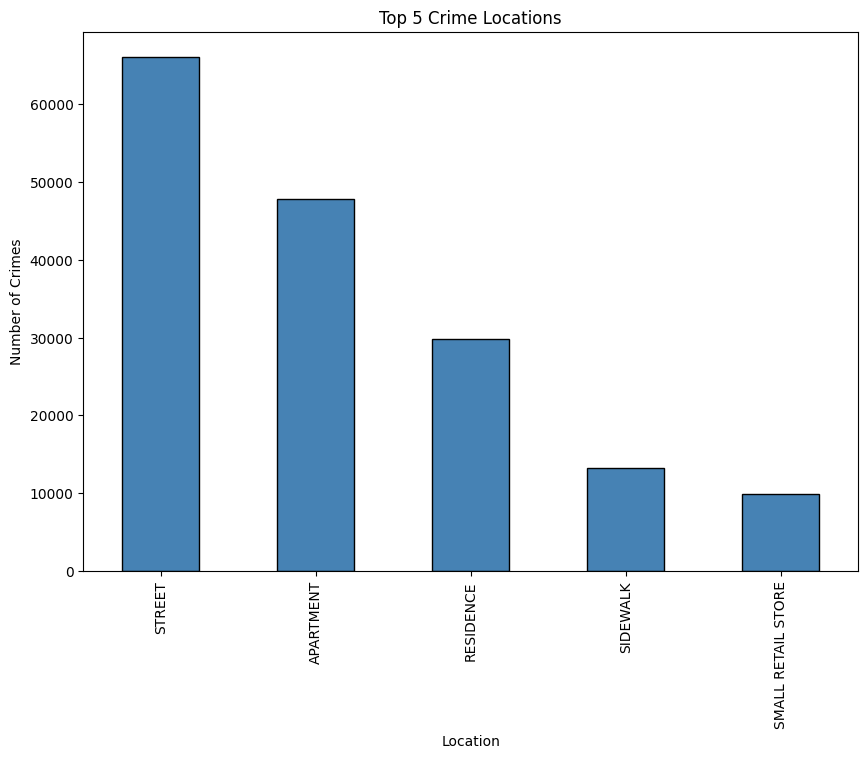

In [11]:
loc_counts = crimes['Location Description'].value_counts().head(5)

plt.figure(figsize=(10,7))
loc_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Top 5 Crime Locations')
plt.xlabel('Location'); plt.ylabel('Number of Crimes')
plt.show()

<H1>INSIGHTS:</H1>

<h3>1.Streets are the most common crime location with 66,040 number of crimes happen.This shows that people are more likely to experience crime when they are outside in public spaces, especially on busy streets.</h3>

<h3>2.Homes are also a major target. When you combine apartments and residences, they account for almost half of all the incidents. This means that crimes don’t just happen outside, but also in private living spaces.</h3>
<hr>

<h2>2.What are the most common types of theft?</h2>

In [12]:
theft = crimes['Description'].value_counts().head(10)
theft

Description
SIMPLE                     30526
DOMESTIC BATTERY SIMPLE    19810
$500 AND UNDER             17963
OVER $500                  16572
TO VEHICLE                 14886
AUTOMOBILE                 14780
RETAIL THEFT               14053
TO PROPERTY                11652
AGGRAVATED - HANDGUN        5935
FROM BUILDING               4941
Name: count, dtype: int64

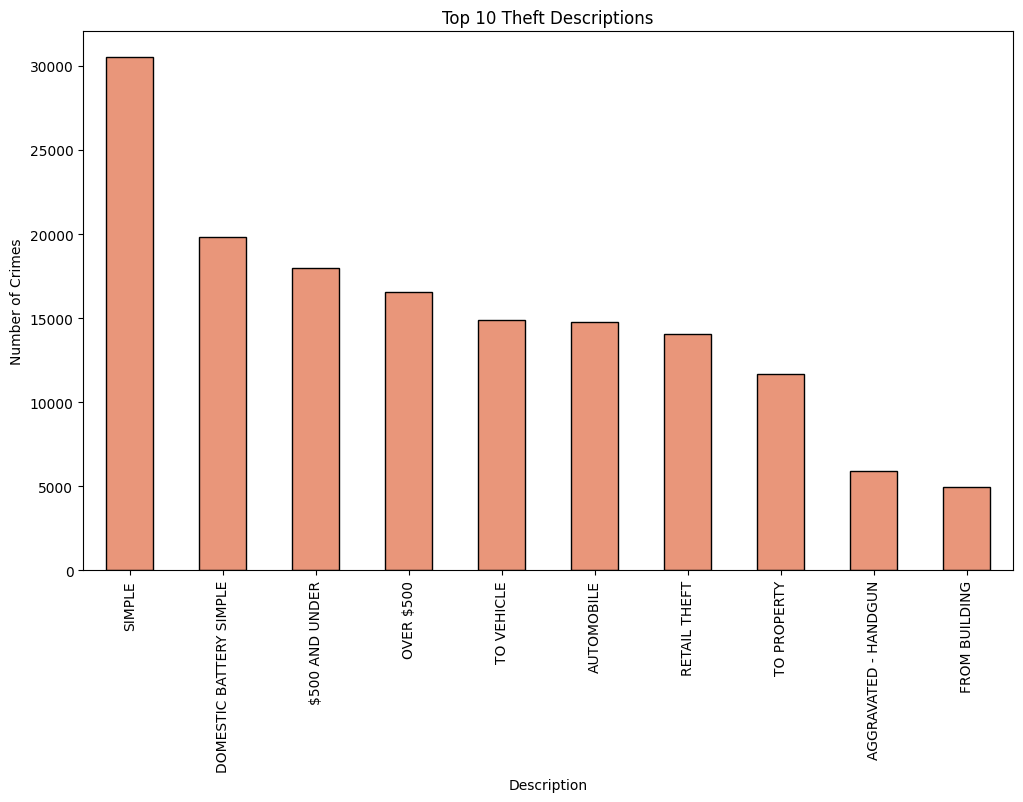

In [13]:
theft = crimes['Description'].value_counts().head(10)

plt.figure(figsize=(12,7))
theft.plot(kind='bar', color='darksalmon', edgecolor='black')
plt.title('Top 10 Theft Descriptions')
plt.xlabel('Description'); plt.ylabel('Number of Crimes')
plt.show()

<h2>INSIGHTS:</h2>

<h3>3. The most common thefts are simple theft and low-value thefts (under $500), even it shows that amounts are often small, these crimes happen very frequently.</h3>

<h3>4. Vehicle-related thefts and retail theft are also major concerns, highlighting the need for stronger security in public areas and commercial establishments.</h3> 
<hr>

<h2>3.Which month has the highest number of crime in 2025 ?</h2>

In [34]:
crimes[crimes['Date'].dt.year == 2025].groupby(crimes['Date'].dt.month).size()

Date
1     13782
2     11499
3     14341
4      2355
5      2355
6      2213
7      2380
8      2419
9      2328
10     2446
11     2420
12     1667
dtype: int64

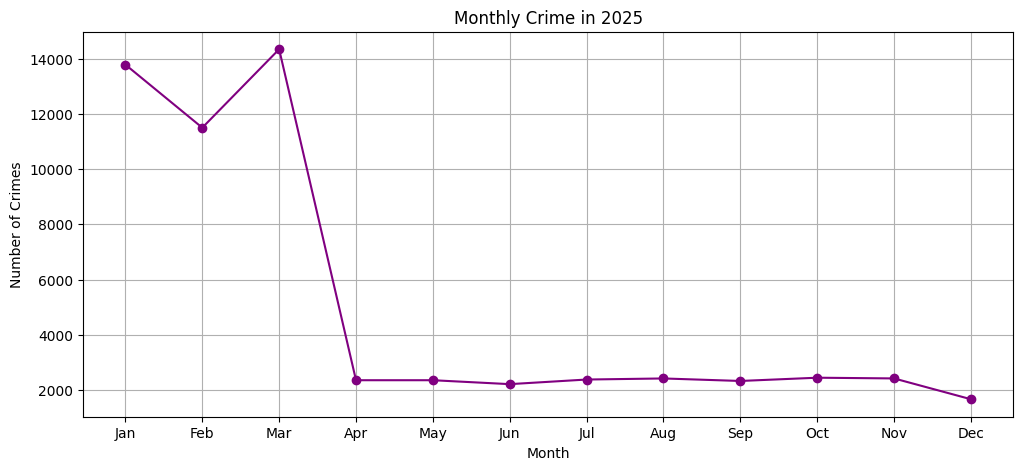

In [37]:
plt.figure(figsize=(12,5))
plt.plot(monthly_crimes.index, monthly_crimes.values, marker='o', color='purple')
plt.title('Monthly Crime in 2025')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True)
plt.show()

<h2>INSIGHTS:</h2>

<h3>5. The highest crime activity occurs in the early months of the year with January, February, and March showing the largest numbers.</h3>

<h3>6. There is a sharp drop in crime counts after March, decreasing by over 80%, which may indicate seasonal effects or changes in reporting.</h3>

<h3>7.December has the lowest crime count, which may indicate reduced activity due to holidays or increased community vigilance at year-end.</h2>

<h2>4.What crime types are more likely to happen at night?</h2>

In [41]:
night_crimes = crimes[crimes['Date'].dt.hour >= 20]
counts = night_crimes['Primary Type'].value_counts()

In [42]:
counts

Primary Type
BATTERY                              9031
THEFT                                8523
CRIMINAL DAMAGE                      5697
MOTOR VEHICLE THEFT                  4908
ASSAULT                              3761
OTHER OFFENSE                        2678
WEAPONS VIOLATION                    2133
ROBBERY                              1900
NARCOTICS                            1303
BURGLARY                             1208
DECEPTIVE PRACTICE                   1035
CRIMINAL TRESPASS                     739
CRIMINAL SEXUAL ASSAULT               323
PUBLIC PEACE VIOLATION                230
PROSTITUTION                          201
OFFENSE INVOLVING CHILDREN            201
INTERFERENCE WITH PUBLIC OFFICER      196
SEX OFFENSE                           175
HOMICIDE                              122
ARSON                                 109
STALKING                               94
LIQUOR LAW VIOLATION                   90
CONCEALED CARRY LICENSE VIOLATION      49
KIDNAPPING           

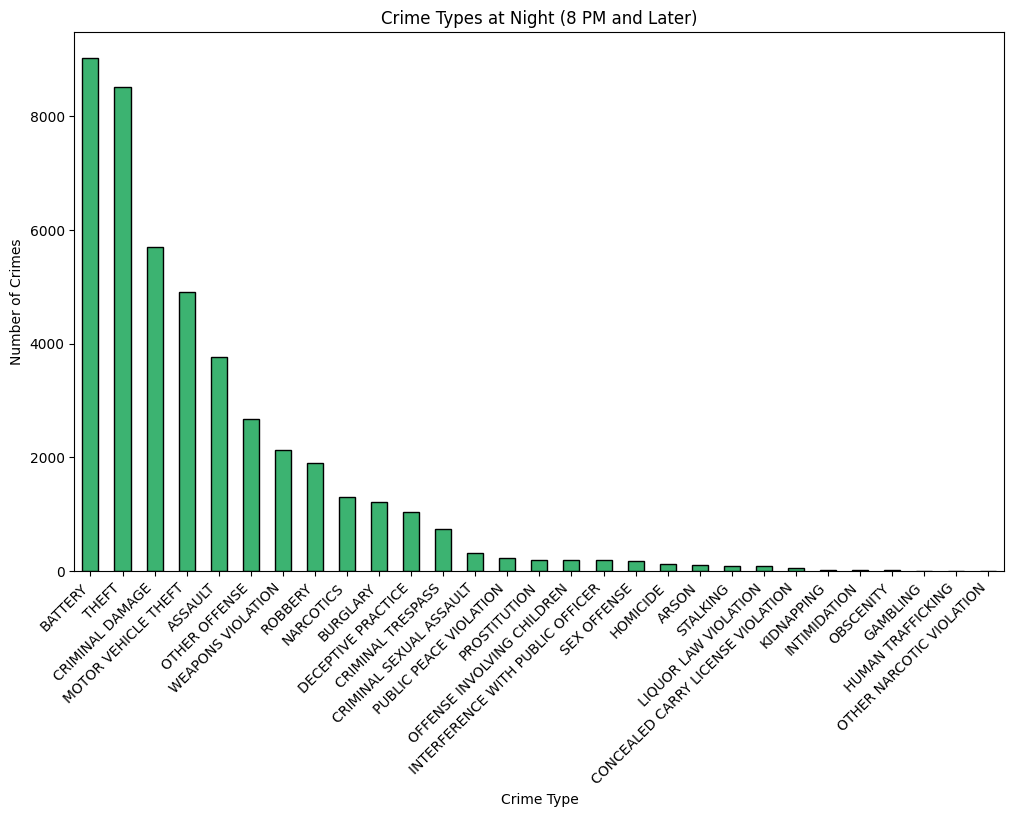

In [46]:
plt.figure(figsize=(12,7))
counts.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Crime Types at Night (8 PM and Later)')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.show()

<h3>8.Battery is the most common crime type at night, significantly higher than others, suggesting physical disagreement occur more often after dark.</h3>

<h3> 9. Theft and Criminal Damage are also high at night, indicating property-related crimes increase during nighttime hours.</h3>

<h3>10. Serious but less common crimes like car theft and assault still happen at night, suggesting criminals take advantage of low visibility and fewer police around.</h3>
<hr>

<h2>5.Which District has the highest crime number recorded?</h2>

In [51]:
district = crimes.groupby("District").size().reset_index(name='count')
district

,District,count
0,1,14409
1,2,12848
2,3,12545
3,4,13318
4,5,9883
5,6,14157
6,7,10520
7,8,16691
8,9,10910
9,10,10133


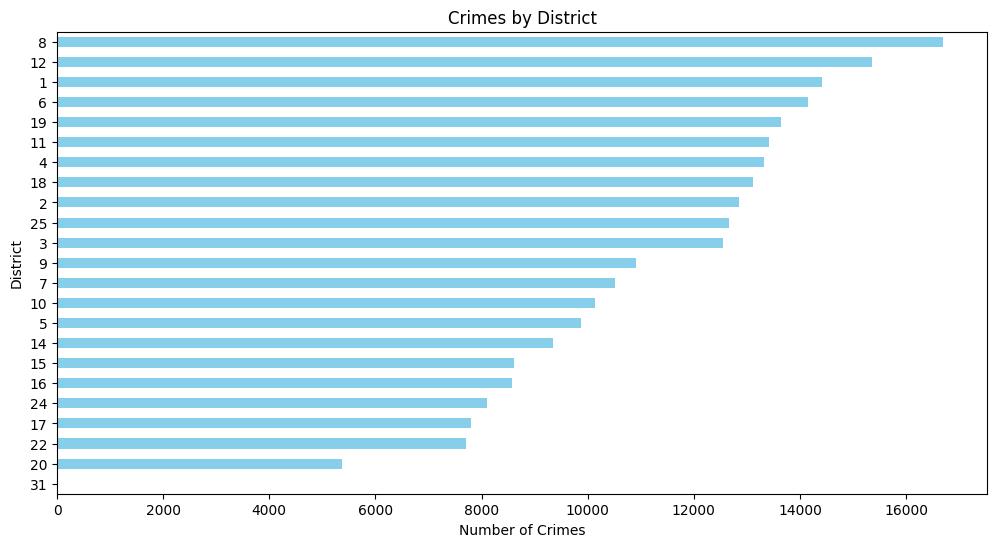

In [70]:
plt.figure(figsize=(12,6))
district_crimes.sort_values(ascending=True).plot(kind='barh', color='skyblue' )

plt.title("Crimes by District")
plt.xlabel("Number of Crimes")
plt.ylabel("District")
plt.show()

<h2>INSIGHTS:</h2>

<h3>11.It shows that District 8 has the highest number of crimes with a total of 10,910.</h3>

<h3>12.The Districts 12, 1, and 6 also have relatively high crime rates, indicating multiple areas of concern.</h3>

<h3>13.Based on the graph, District 31 has the lowest number of crimes, suggesting it is much safer compared to others.</h3>
<hr>

<h2>6.What year recorded the highest arrests rate?</h2>

In [77]:
arrest_rate= crimes.groupby("Year")["Arrest"].mean().reset_index()
arrest_rate

,Year,Arrest
0,2024,0.134540
1,2025,0.175816


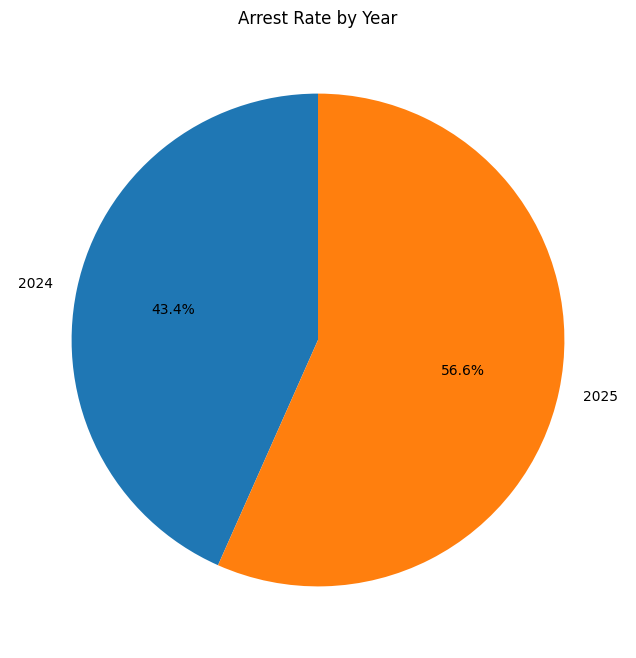

In [78]:
plt.figure(figsize=(8, 8))
plt.pie(arrest_rate["Arrest"], labels=arrest_rate["Year"], autopct='%1.1f%%', startangle=90)
plt.title("Arrest Rate by Year")
plt.show()

<h2>INSIGHTS:</h2>

<h3>15.The arrest rate increased from about 13% in 2024 to about 18% in 2025, showing a notable rise.</h3>

<h3>16. The data shows a larger portion of crimes in 2025 resulted in arrests compared to the previous year.</h3>

<h3>17.Based on the analysis the change could be due to improved police efficiency, more strict enforcement, or changes in crime patterns.</h3>
<hr>

<h2>7.What percentage of crimes are domestic related?</h2>

In [82]:
domestic_percentage = crimes["Domestic"].mean() * 100
domestic_percentage

np.float64(18.604063053190593)

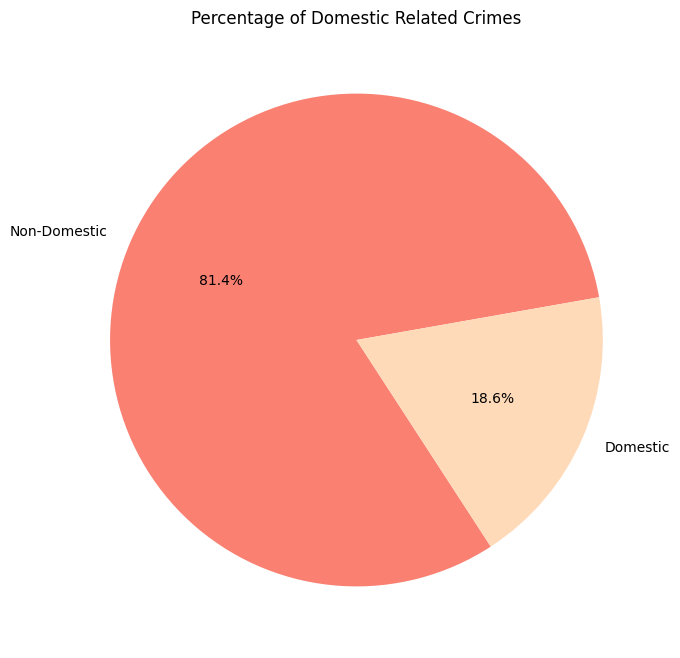

In [89]:
domestic_counts = crimes['Domestic'].value_counts()
labels = ['Non-Domestic', 'Domestic']
sizes = [domestic_counts[False], domestic_counts[True]]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=10, colors=['salmon', 'peachpuff'])
plt.title("Percentage of Domestic Related Crimes")
plt.show()

<h2>INSIGHTS:</h2>

<h3>18. This result shows that 18.60% of crimes are domestic-related, meaning almost 1 in 5 incidents involve domestic situations.</h3>

<h3>19. It emphasizes that while domestic crimes are fewer, they may require specialized attention due to their personal nature.</h3>

<h3>20.The data shows that most crimes 81.4% are non-domestic, meaning they happen outside of family or intimate relationships.</h3>

<h3>21.Analysis reveals that non-domestic crimes occur more frequently, suggesting that public spaces and community areas are where most crimes happen.</h3>
<hr>

<h2>8.</h2>

<h2>INSIGHTS:</h2>